#  Logistic Regression Using Gradient Descent 

### Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

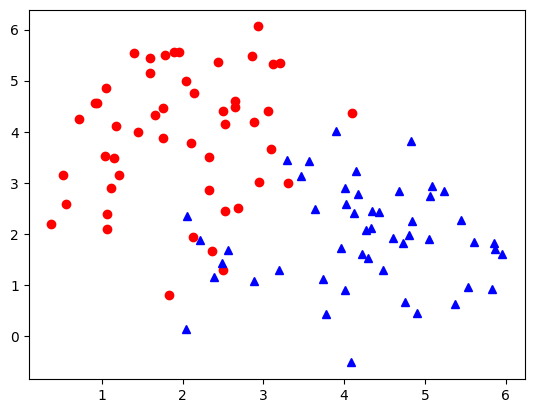

In [4]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.show()

In [9]:
print(len(X), len(y))

100 100


In [10]:
def sigmoid(z):
    val = 1.0/(1+np.exp(-z))
    return val

In [11]:
def loss_function(y, y_1):
    loss = -np.mean(y*(np.log(y_1)) - (1 - y)*np.log(1-y_1))
    return loss

In [12]:
def gradient_descent(X, y, y_1):
    num_training_samples = X.shape[0]
    delta_w = (1/num_training_samples)*np.dot(X.T, (y_1 - y))
    delta_b = (1/num_training_samples)*np.sum((y_1 - y))
    return delta_w, delta_b

In [43]:
def logistic_regression(X, w, b):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
#     fig = plt.figure(figsize=(20,10))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-20, 20])
    plt.ylim([-20, 20])
    plt.xlabel("feat 1")
    plt.ylabel("feat 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')
    plt.show()

In [44]:
def train(X, y, bs, epochs, lr):
    p, q = X.shape
    w = np.zeros((q, 1))
    b = 0
    
    y = y.reshape(p, 1)
#     m, n = X.shape
    for i in range(q):
        X = (X - X.mean(axis=0))/X.std(axis=0)
    loss = []
    
    for epoch in range(epochs):
        for i in range((p-1)//bs+1):
            si = i*bs
            ei = si + bs
            xb = X[si:ei]
            yb = y[si:ei]
            
            y_1 = sigmoid(np.dot(xb, w) + b)
            delta_w, delta_b = gradient_descent(xb, yb, y_1)
            
            w -= lr*delta_w
            b -= lr*delta_b
        l = loss_function(y, sigmoid(np.dot(X, w) + b))
        loss.append(l)
    
    return w, b, loss

In [45]:
def predict(X):
    m, n = X.shape
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
    predictions = sigmoid(np.dot(X, w) + b)
    predicted_class = []
    predicted_class = [1 if i > 0.5 else 0 for i in predictions]
    return np.array(prediction_class)

In [46]:
w, b, l = train(X, y, bs=1, epochs=10, lr=0.01)

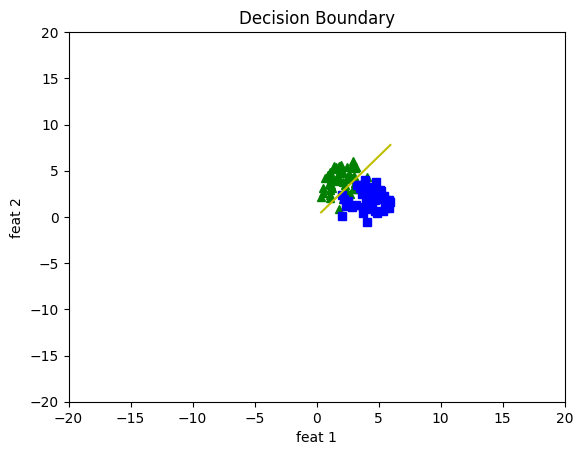

In [47]:
logistic_regression(X, w, b)

In [2]:
M = [[4, 8], [11, 7], [14, -2]]
M = np.array(M)
print(M)

[[ 4  8]
 [11  7]
 [14 -2]]


In [15]:
M_t = M.T
print(M_t)

[[ 4 11 14]
 [ 8  7 -2]]


In [18]:
M_tM = np.dot(M_t, M)
print(M_tM)

[[333  81]
 [ 81 117]]


In [19]:
val, vec = np.linalg.eig(M_tM)
print(val, vec)

[360.  90.] [[ 0.9486833  -0.31622777]
 [ 0.31622777  0.9486833 ]]
